# Ethique et responsabilité jeu de donné

<Axes: >

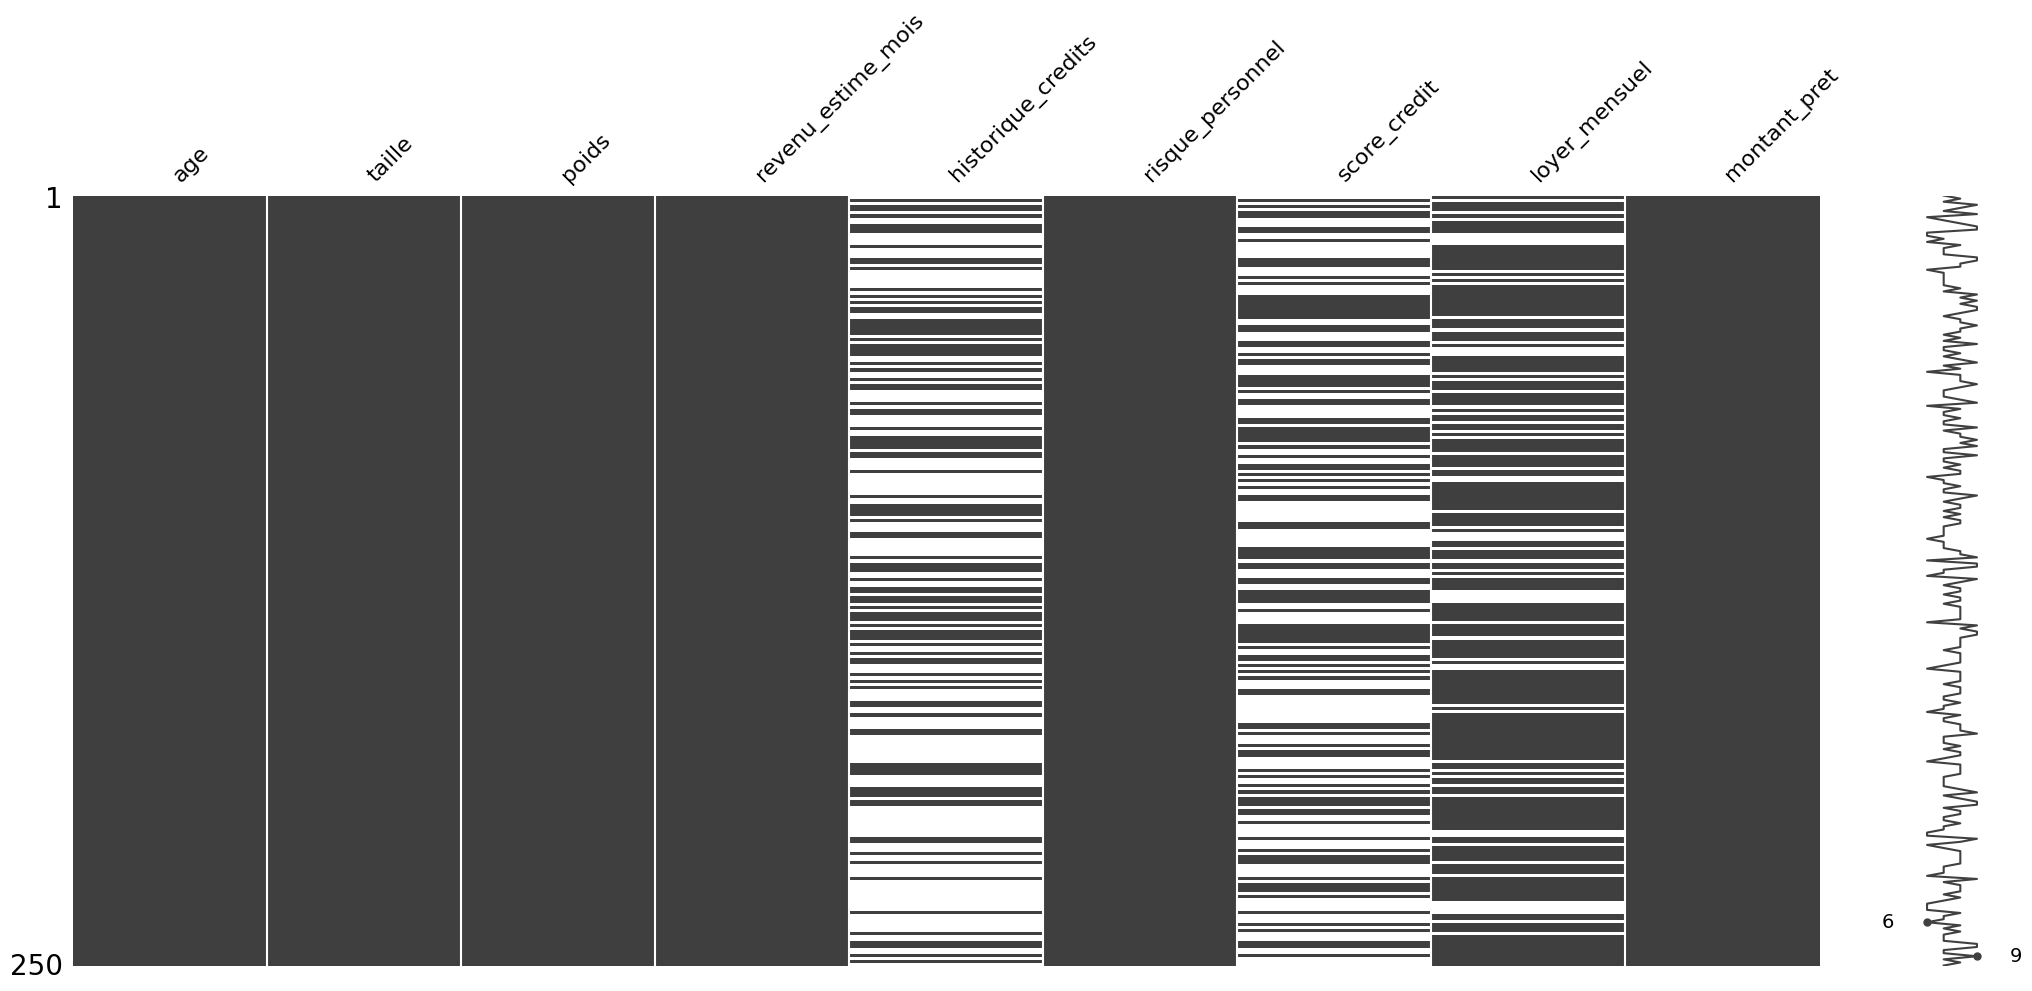

In [2]:
import pandas as pd
from os.path import join as join
collisions = pd.read_csv(join('data', "data_numeric_only.csv"))
import missingno as msno
%matplotlib inline
msno.matrix(collisions.sample(250))

In [3]:
collisions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 10000 non-null  int64  
 1   taille              10000 non-null  float64
 2   poids               10000 non-null  float64
 3   revenu_estime_mois  10000 non-null  int64  
 4   historique_credits  4707 non-null   float64
 5   risque_personnel    10000 non-null  float64
 6   score_credit        4694 non-null   float64
 7   loyer_mensuel       7094 non-null   float64
 8   montant_pret        10000 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 703.2 KB


## analyse :
On a 3 colonnes avec des valeurs manquantes :
- historique_credits
- score_credit
- loyer_mensuel
  
historique_credits et score_credit sont trop vides pour être utiles.
loyer_mensuel peut etre rempli par la moyenne


      

In [4]:
collisions.describe()

,age,taille,poids,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
count,10000.000000,10000.000000,10000.000000,10000.000000,4707.000000,10000.000000,4694.000000,7094.00000,10000.000000
mean,46.516500,170.003760,70.064080,2520.996200,2.543446,0.499094,573.495952,5175.89104,9149.762575
std,16.832845,10.006542,15.014911,1157.532502,1.691198,0.290107,159.140639,3750.61004,10785.937404
min,18.000000,119.200000,10.500000,500.000000,0.000000,0.000000,300.000000,-395.25000,500.000000
25%,32.000000,163.200000,59.800000,1683.000000,1.000000,0.240000,437.000000,985.76750,500.000000
50%,46.000000,170.100000,70.200000,2480.000000,3.000000,0.500000,574.000000,5000.00000,3600.605667
75%,61.000000,176.800000,80.300000,3304.000000,4.000000,0.750000,712.000000,10000.00000,16245.534725
max,75.000000,209.800000,145.200000,6826.000000,5.000000,1.000000,849.000000,10000.00000,53192.053509


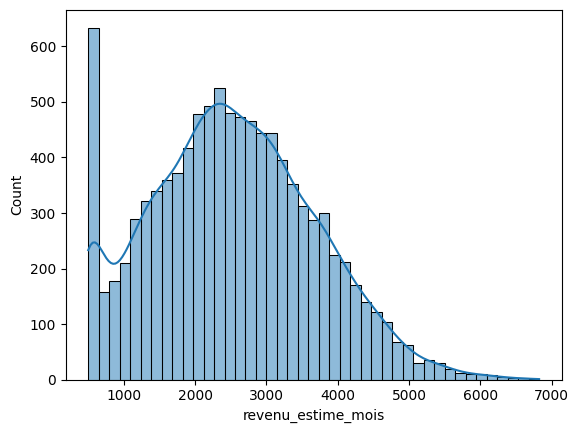

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Visualisation de la distribution des âges
sns.histplot(collisions['revenu_estime_mois'], kde=True)
plt.show()

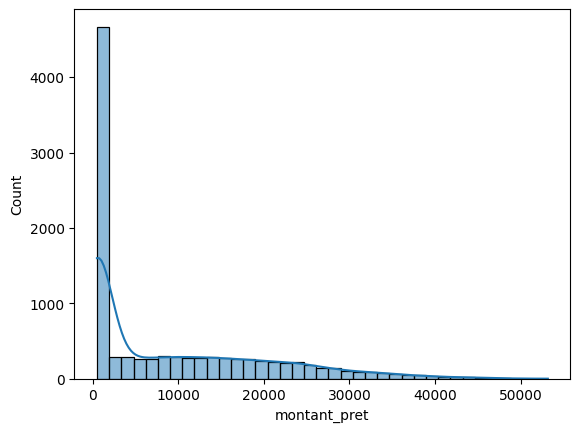

In [10]:
# Visualisation de la distribution des régions
sns.histplot(collisions['montant_pret'], kde=True)
plt.show()

# Action sur le dataset : 


## Nettoyage et remplissage des colonnes

 ### On rempli les colonnes manquantes avec la moyenne ou avec la mod

In [11]:
 ### on rempli loyer mensuel avec la moyenne 
collisions['loyer_mensuel'] = collisions['loyer_mensuel'].fillna(collisions['loyer_mensuel'].mean())

## On filtres les outliers : poids incohérent ou loyer négatif

In [12]:
### filter outlers values
collisions = collisions[(collisions['poids'] > 30) & (collisions['loyer_mensuel'] > 0)]

### On vire car trop peu de données

In [13]:

collisions.drop(columns=['score_credit'], inplace=True, errors='ignore')
collisions.drop(columns=['historique_credits'], inplace=True, errors='ignore')

C:\Users\ol4\AppData\Local\Temp\ipykernel_11240\1662427958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collisions.drop(columns=['score_credit'], inplace=True, errors='ignore')
C:\Users\ol4\AppData\Local\Temp\ipykernel_11240\1662427958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collisions.drop(columns=['historique_credits'], inplace=True, errors='ignore')


# Dataset Final

In [14]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9946 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 9946 non-null   int64  
 1   taille              9946 non-null   float64
 2   poids               9946 non-null   float64
 3   revenu_estime_mois  9946 non-null   int64  
 4   risque_personnel    9946 non-null   float64
 5   loyer_mensuel       9946 non-null   float64
 6   montant_pret        9946 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 621.6 KB


## Définition des colonnes numériques / categorielles
on défini les colonnes numériques les entrainements de modèles

In [ ]:
numerical_cols = ["age", "taille", "poids", "revenu_estime_mois", "risque_personnel", "loyer_mensuel"]    

In [15]:
# Sauvegarde du dataset nettoyé
collisions.to_csv(join('data', 'df_data_numeric_cleaned.csv'), index=False)